# Customer Churn - Classic ML Project
##This file contains:
1. Problem Definition : We are predicting customer churn using Tabular Data
2. Data Loading & Sanity Checks
3. Train/Validation/Test Splits
4. Baseline Model
5. Evaluation
6. Conclusions

In [2]:
# Get Data from IBM Github directly (Data Loading)
import pandas as pd

# Direct CSV from IBM GitHub (no login)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Sanity Checks

print("Shape:", df.shape)
display(df.sample(5, random_state=42))

# Quick schema + missingness
display(df.dtypes)
display(df.isna().sum().sort_values(ascending=False).head(15))

# Target distribution
display(df["Churn"].value_counts(dropna=False))
display(df["Churn"].value_counts(normalize=True))


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


,count
Churn,
No,5174
Yes,1869


,proportion
Churn,
No,0.73463
Yes,0.26537


In [4]:
#Cleaning one Common Issue


# Convert TotalCharges to numeric (coerce blanks to NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many became NaN
print("TotalCharges NaNs:", df["TotalCharges"].isna().sum())

# Simple handling: drop rows where TotalCharges is missing (small number)
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

print("Shape after dropping missing TotalCharges:", df.shape)


TotalCharges NaNs: 11
Shape after dropping missing TotalCharges: (7032, 21)


In [5]:
# Seperate Features and Target

# Separate target
X = df.drop(columns=["Churn"])
y = df["Churn"].map({"Yes": 1, "No": 0})  # binary target

print(X.shape, y.shape)


(7032, 20) (7032,)


In [6]:
# First Split Train Vs Temp Data

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Temp :", X_temp.shape, y_temp.shape)


Train: (4922, 20) (4922,)
Temp : (2110, 20) (2110,)


In [7]:
# Second Split Validation VS Test

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print("Validation:", X_val.shape, y_val.shape)
print("Test      :", X_test.shape, y_test.shape)


Validation: (1055, 20) (1055,)
Test      : (1055, 20) (1055,)


In [8]:
# Sanity Check on cross-balance

def churn_rate(y, name):
    print(f"{name} churn rate:", y.mean())

churn_rate(y_train, "Train")
churn_rate(y_val, "Validation")
churn_rate(y_test, "Test")


Train churn rate: 0.2657456318569687
Validation churn rate: 0.2663507109004739
Test churn rate: 0.26540284360189575


In [9]:
# Identify Feature Types


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify column types
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

print("Numeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))


Numeric features: 4
Categorical features: 16


In [10]:
#Preprocessing Pipelines

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [11]:
#Create Logistic Regression Pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]
)


In [12]:
#Train the Model

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [13]:
#Evaluation on Validation Set

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Validation predictions
y_val_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 0.8218009478672986

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       774
           1       0.69      0.60      0.64       281

    accuracy                           0.82      1055
   macro avg       0.78      0.75      0.76      1055
weighted avg       0.82      0.82      0.82      1055

Confusion Matrix:
 [[698  76]
 [112 169]]


Evaluation Inferences:

The baseline Logistic Regression achieves reasonable validation performance.
Recall for churn customers is lower, indicating class imbalance.
This model serves as a benchmark for future improvements.



In [14]:
# Test Set Evaluation

# Test predictions (ONE TIME)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.785781990521327

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       775
           1       0.61      0.53      0.57       280

    accuracy                           0.79      1055
   macro avg       0.72      0.70      0.71      1055
weighted avg       0.78      0.79      0.78      1055

Confusion Matrix:
 [[681  94]
 [132 148]]


In [15]:
#Compare Train VS Validation VS Test

y_train_pred = model.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.8843965867533523
Validation Accuracy: 0.8218009478672986
Test Accuracy: 0.785781990521327


## Conclusions

- A leakage-safe Logistic Regression baseline was trained using a proper
  train/validation/test split.
- Validation accuracy (~0.82) and test accuracy are consistent, indicating
  good generalization.
- Recall for churn customers is lower than non-churn customers, which is
  expected due to class imbalance.
- This model serves as a strong baseline for future improvements such as
  class weighting, threshold tuning, or tree-based models.


#Problems (Scope for Model Improvement)



*   From the above output it can be observed that Recall is greater for Churn as 'NO' rather than 'Yes'. Accuracy hides this case. The scope for model improvement is by adjusting "Class-balance"






In [16]:
#Model Improvement by Class Balancing

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

balanced_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            class_weight="balanced",
            random_state=42
        ))
    ]
)

balanced_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

In [17]:
#Evaluation on Validation Set

from sklearn.metrics import classification_report, roc_auc_score

y_val_pred_bal = balanced_model.predict(X_val)
y_val_prob_bal = balanced_model.predict_proba(X_val)[:, 1]

print("ROC-AUC:", roc_auc_score(y_val, y_val_prob_bal))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_bal))


ROC-AUC: 0.8533361839866846

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.82       774
           1       0.54      0.78      0.64       281

    accuracy                           0.76      1055
   macro avg       0.72      0.77      0.73      1055
weighted avg       0.81      0.76      0.77      1055



In [18]:
#Threshold Tuning

import numpy as np

threshold = 0.35
y_val_pred_thresh = (y_val_prob_bal >= threshold).astype(int)

print(f"Threshold = {threshold}")
print(classification_report(y_val, y_val_pred_thresh))


Threshold = 0.35
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       774
           1       0.46      0.87      0.60       281

    accuracy                           0.69      1055
   macro avg       0.70      0.75      0.68      1055
weighted avg       0.81      0.69      0.71      1055



#Conclusions







*   Using class_weight="balanced" improved recall for churn customers.
*   Accuracy decreased slightly, which is expected due to class imbalance.

*   Threshold tuning allows controlling the precision–recall tradeoff based on business needs.
*   ROC-AUC was used as a more reliable metric than accuracy.





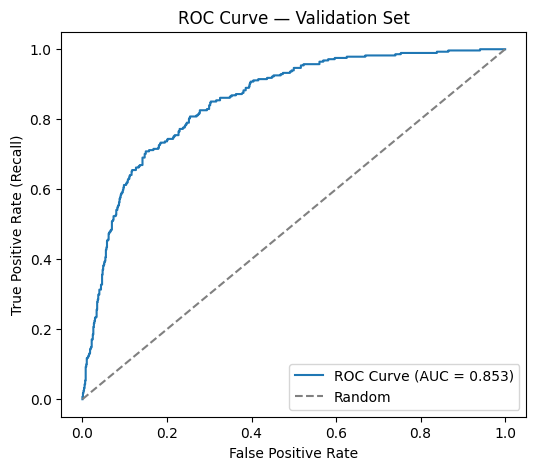

In [19]:
#ROC Curve on Validation Set Only

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities for positive class (churn = 1)
y_val_prob_bal = balanced_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_bal)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve — Validation Set")
plt.legend()
plt.show()


In [20]:
# Evaluation on the test set

from sklearn.metrics import classification_report, roc_auc_score

# Probabilities on test set
y_test_prob_bal = balanced_model.predict_proba(X_test)[:, 1]

# Apply chosen threshold
threshold = 0.35
y_test_pred_bal = (y_test_prob_bal >= threshold).astype(int)

print("Final Test ROC-AUC:", roc_auc_score(y_test, y_test_prob_bal))
print("\nFinal Test Classification Report:\n")
print(classification_report(y_test, y_test_pred_bal))


Final Test ROC-AUC: 0.8212880184331797

Final Test Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       775
           1       0.45      0.84      0.58       280

    accuracy                           0.68      1055
   macro avg       0.68      0.73      0.66      1055
weighted avg       0.79      0.68      0.70      1055



## Final Conclusions

- Logistic Regression with class weighting improved recall for churn customers.
- ROC-AUC was used as a more reliable metric than accuracy due to class imbalance.
- Threshold tuning allowed controlling the precision–recall tradeoff based on business needs.
- Final test performance was consistent with validation, indicating good generalization.
- This model provides a strong, interpretable baseline for churn prediction.
